![image.png](https://i.imgur.com/a3uAqnb.png)

# Natural Language Processing (NLP)
# Second : Text Feature Engineering
---


### ⚠️ Key Challenges with Raw Text:
- **High Dimensionality**: Language has a vast and potentially infinite vocabulary.
- **Sparsity**: Most words are rare; many documents share few common words.
- **Variable Length**: Text data comes in all sizes, from tweets to full articles.
- **Semantic Complexity**: Different words and phrases can express the **same meaning**.

---

### 🎯 Goals of Feature Engineering:

| Goal                           | Description                                                        |
|---------------------------------|--------------------------------------------------------------------|
| **Capture Semantic Information** | Preserve meaning and context in numerical form                      |
| **Reduce Dimensionality**        | Minimize computational cost while retaining important information   |
| **Handle Sparsity**              | Create dense, informative representations even with limited data    |
| **Enable Machine Learning**      | Translate text into numerical formats that algorithms can process    |

---







## 🧩 1. Bag of Words (BoW)

### 📌 What is Bag of Words?

**Bag of Words (BoW)** is one of the simplest and most widely used techniques for converting text into numerical features.

- It represents each document by counting how many times each word appears.
- It **ignores grammar, word order, and meaning**—it focuses only on **word frequency**.

The result is a **vectorized representation** of text suitable for machine learning models.

---

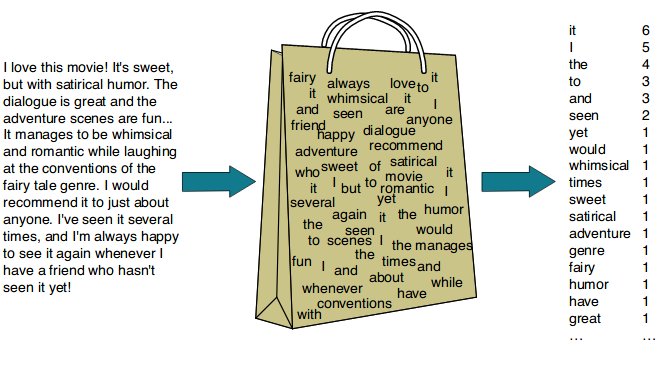


In [ ]:

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt

documents = [
    "I love machine learning and artificial intelligence",
    "Machine learning is a subset of artificial intelligence",
    "Natural language processing is part of machine learning",
    "I enjoy working with natural language processing",
    "Artificial intelligence will change the world",
    "Deep learning is a powerful machine learning technique"
]

print("Sample Documents:")
for i, doc in enumerate(documents, 1):
    print(f"Doc {i}: {doc}")

Sample Documents:
Doc 1: I love machine learning and artificial intelligence
Doc 2: Machine learning is a subset of artificial intelligence
Doc 3: Natural language processing is part of machine learning
Doc 4: I enjoy working with natural language processing
Doc 5: Artificial intelligence will change the world
Doc 6: Deep learning is a powerful machine learning technique


In [ ]:
tokenized_docs = [doc.lower().split() for doc in documents]

print("Tokenized Documents:")
for doc in tokenized_docs:
    print(doc)

#  Create the vocabulary (unique words)
vocab = sorted(set(word for doc in tokenized_docs for word in doc))
print("\nVocabulary:", vocab)

bow_matrix = []

for doc in tokenized_docs:
    word_counts = [doc.count(word) for word in vocab]
    bow_matrix.append(word_counts)

import pandas as pd
bow_df = pd.DataFrame(bow_matrix, columns=vocab)
print("\nManual Bag of Words Matrix:")
bow_df.head()

Tokenized Documents:
['i', 'love', 'machine', 'learning', 'and', 'artificial', 'intelligence']
['machine', 'learning', 'is', 'a', 'subset', 'of', 'artificial', 'intelligence']
['natural', 'language', 'processing', 'is', 'part', 'of', 'machine', 'learning']
['i', 'enjoy', 'working', 'with', 'natural', 'language', 'processing']
['artificial', 'intelligence', 'will', 'change', 'the', 'world']
['deep', 'learning', 'is', 'a', 'powerful', 'machine', 'learning', 'technique']

Vocabulary: ['a', 'and', 'artificial', 'change', 'deep', 'enjoy', 'i', 'intelligence', 'is', 'language', 'learning', 'love', 'machine', 'natural', 'of', 'part', 'powerful', 'processing', 'subset', 'technique', 'the', 'will', 'with', 'working', 'world']

Manual Bag of Words Matrix:


,a,and,artificial,change,deep,enjoy,i,intelligence,is,language,...,part,powerful,processing,subset,technique,the,will,with,working,world
0,0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,1,1,0
4,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(lowercase=True)

# Fit and transform the documents
X = vectorizer.fit_transform(documents)

# Display vocabulary
print("Vocabulary:", vectorizer.get_feature_names_out())

# Display BoW feature matrix
import pandas as pd
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("\nBag of Words Matrix using CountVectorizer:")
bow_df.head()


Vocabulary: ['and' 'artificial' 'change' 'deep' 'enjoy' 'intelligence' 'is' 'language'
 'learning' 'love' 'machine' 'natural' 'of' 'part' 'powerful' 'processing'
 'subset' 'technique' 'the' 'will' 'with' 'working' 'world']

Bag of Words Matrix using CountVectorizer:


,and,artificial,change,deep,enjoy,intelligence,is,language,learning,love,...,part,powerful,processing,subset,technique,the,will,with,working,world
0,1,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,1,0,...,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


## 📏 2. TF-IDF (Term Frequency-Inverse Document Frequency)

### 📌 What is TF-IDF?

**TF-IDF** is an improvement over Bag of Words. It measures how **important** a word is to a document **relative to a collection of documents**.

### ➗ Formula:
- **TF (Term Frequency)**: How often a word appears in a document
- **IDF (Inverse Document Frequency)**: How unique or rare the word is across all documents

$$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \log\left( \frac{N}{1 + \text{DF}(t)} \right)
$$


Where:
- **t** = term (word)
- **d** = document
- **N** = total number of documents
- **DF(t)** = number of documents containing term t

---
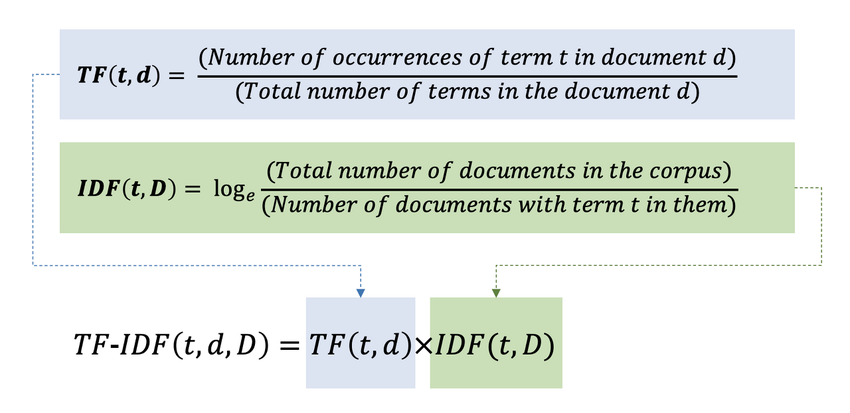



In [ ]:
import math
import pandas as pd

tokenized_docs = [doc.lower().split() for doc in documents]
# Vocabulary
vocab = sorted(set(word for doc in tokenized_docs for word in doc))
# Term Frequency (TF)
tf_list = []
for doc in tokenized_docs:
    tf_doc = {word: doc.count(word) / len(doc) for word in vocab}
    tf_list.append(tf_doc)
tf_df = pd.DataFrame(tf_list).fillna(0)
print("Term Frequency (TF):")
print(tf_df)

# Document Frequency (DF)
df = {word: sum(1 for doc in tokenized_docs if word in doc) for word in vocab}

# Inverse Document Frequency (IDF)
N = len(documents)
idf = {word: math.log((N + 1) / (df[word] + 1)) + 1 for word in vocab}  # Smoothing

# Compute TF-IDF
tfidf_df = tf_df.copy()
for word in vocab:
    tfidf_df[word] = tf_df[word] * idf[word]

print("\nManual TF-IDF Matrix:")
print(tfidf_df.round(3))

Term Frequency (TF):
       a       and  artificial    change   deep     enjoy         i  \
0  0.000  0.142857    0.142857  0.000000  0.000  0.000000  0.142857   
1  0.125  0.000000    0.125000  0.000000  0.000  0.000000  0.000000   
2  0.000  0.000000    0.000000  0.000000  0.000  0.000000  0.000000   
3  0.000  0.000000    0.000000  0.000000  0.000  0.142857  0.142857   
4  0.000  0.000000    0.166667  0.166667  0.000  0.000000  0.000000   
5  0.125  0.000000    0.000000  0.000000  0.125  0.000000  0.000000   

   intelligence     is  language  ...   part  powerful  processing  subset  \
0      0.142857  0.000  0.000000  ...  0.000     0.000    0.000000   0.000   
1      0.125000  0.125  0.000000  ...  0.000     0.000    0.000000   0.125   
2      0.000000  0.125  0.125000  ...  0.125     0.000    0.125000   0.000   
3      0.000000  0.000  0.142857  ...  0.000     0.000    0.142857   0.000   
4      0.166667  0.000  0.000000  ...  0.000     0.000    0.000000   0.000   
5      0.0000

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform documents
X_tfidf = tfidf_vectorizer.fit_transform(documents)

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Matrix using TfidfVectorizer:")
print(tfidf_df.round(3))


TF-IDF Matrix using TfidfVectorizer:
     and  artificial  change   deep  enjoy  intelligence     is  language  \
0  0.523       0.362   0.000  0.000  0.000         0.362  0.000     0.000   
1  0.000       0.354   0.000  0.000  0.000         0.354  0.354     0.000   
2  0.000       0.000   0.000  0.000  0.000         0.000  0.314     0.371   
3  0.000       0.000   0.000  0.000  0.446         0.000  0.000     0.366   
4  0.000       0.311   0.449  0.000  0.000         0.311  0.000     0.000   
5  0.000       0.000   0.000  0.437  0.000         0.000  0.302     0.000   

   learning   love  ...   part  powerful  processing  subset  technique  \
0     0.310  0.523  ...  0.000     0.000       0.000   0.000      0.000   
1     0.304  0.000  ...  0.000     0.000       0.000   0.512      0.000   
2     0.269  0.000  ...  0.453     0.000       0.371   0.000      0.000   
3     0.000  0.000  ...  0.000     0.000       0.366   0.000      0.000   
4     0.000  0.000  ...  0.000     0.000       0

# 📚 3-N-Gram Language Model


The goal of a language model is to compute the probability of a **sequence of words**.

We want to compute the joint probability of a sequence of words:

$$
P(w_1, w_2, w_3, \ldots, w_n)
$$

One way to compute this joint probability is by applying the **Chain Rule of Probability**:

$$
P(w_1, w_2, w_3, \ldots, w_n) = P(w_1) \times P(w_2|w_1) \times P(w_3|w_1, w_2) \times \ldots \times P(w_n|w_1, \ldots, w_{n-1})
$$

🖼️ *(Insert chain rule illustration here: `image.jpg`)*

---

## ⚠️ The Problem with Full History

- Using the full history (all previous words) is **computationally infeasible**.
- There is often **insufficient data** to reliably estimate these probabilities.

---

## 💡 The N-gram Approximation

The **N-gram model** simplifies this by **approximating the conditional probability** of a word based on only the **last (N−1) words**:

$$
P(w_n|w_1, w_2, ..., w_{n-1}) \approx P(w_n|w_{n-(N-1)}, ..., w_{n-1})
$$

Examples:
- **Unigram Model (N=1)**: \( P(w_n) \) → Ignores all context
- **Bigram Model (N=2)**: \( P(w_n | w_{n-1}) \)
- **Trigram Model (N=3)**: \( P(w_n | w_{n-2}, w_{n-1}) \)


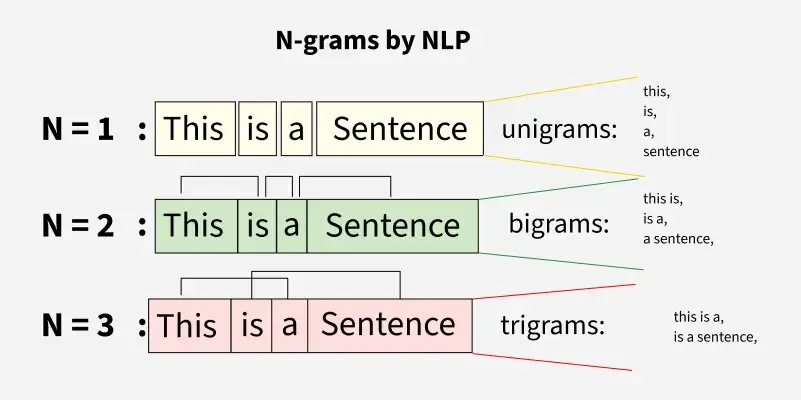
---




In [ ]:

import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

# Load sample data
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()[:10]]

print(f"Loaded {len(documents)} sample documents.")
print("Sample text snippet:\n", documents[0][:300])

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


Loaded 10 sample documents.
Sample text snippet:
 plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the


In [ ]:

nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenize one document
sample_text = documents[0].lower()
tokens = word_tokenize(sample_text)
print("First 20 tokens:", tokens[:20])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


First 20 tokens: ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an']


In [ ]:
from nltk.util import ngrams

# Unigrams
unigrams = list(ngrams(tokens, 1))
print("First 10 unigrams:", unigrams[:10])

# Bigrams
bigrams = list(ngrams(tokens, 2))
print("First 10 bigrams:", bigrams[:10])

# Trigrams
trigrams = list(ngrams(tokens, 3))
print("First 10 trigrams:", trigrams[:10])


First 10 unigrams: [('plot',), (':',), ('two',), ('teen',), ('couples',), ('go',), ('to',), ('a',), ('church',), ('party',)]
First 10 bigrams: [('plot', ':'), (':', 'two'), ('two', 'teen'), ('teen', 'couples'), ('couples', 'go'), ('go', 'to'), ('to', 'a'), ('a', 'church'), ('church', 'party'), ('party', ',')]
First 10 trigrams: [('plot', ':', 'two'), (':', 'two', 'teen'), ('two', 'teen', 'couples'), ('teen', 'couples', 'go'), ('couples', 'go', 'to'), ('go', 'to', 'a'), ('to', 'a', 'church'), ('a', 'church', 'party'), ('church', 'party', ','), ('party', ',', 'drink')]


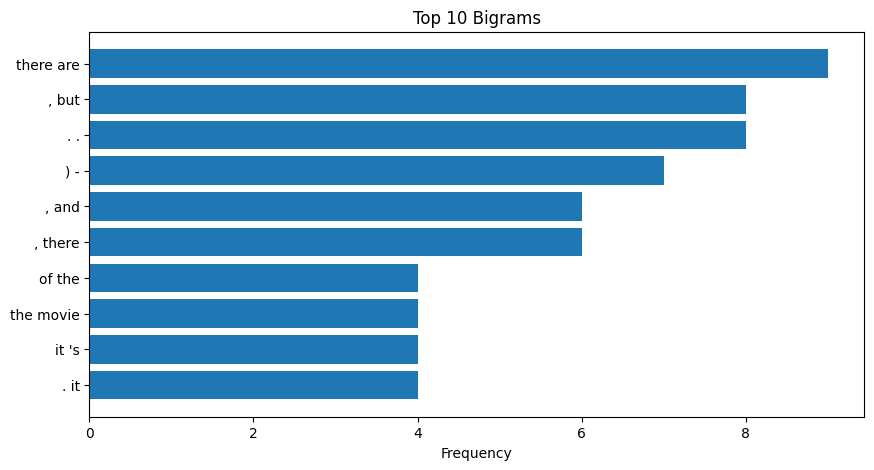

In [ ]:

from collections import Counter
import matplotlib.pyplot as plt

bigram_counts = Counter(bigrams)
common_bigrams = bigram_counts.most_common(10)


bigram_words = [' '.join(b) for b, _ in common_bigrams]
bigram_freqs = [count for _, count in common_bigrams]

plt.figure(figsize=(10,5))
plt.barh(bigram_words, bigram_freqs)
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams')
plt.gca().invert_yaxis()
plt.show()

In [ ]:

documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()[:5]]
text = ' '.join(documents).lower()
tokens = word_tokenize(text)


In [ ]:

bigrams = list(ngrams(tokens, 2))
bigram_model = {}
for w1, w2 in bigrams:
    if w1 in bigram_model:
        bigram_model[w1].append(w2)
    else:
        bigram_model[w1] = [w2]


In [ ]:
def generate_bigram_text(model, start_word, length=20):
    word = start_word
    output = [word]

    for _ in range(length - 1):
        next_words = model.get(word)
        if not next_words:
            break

        word_counts = Counter(next_words)
        words, weights = zip(*word_counts.items())
        word = random.choices(words, weights=weights)[0]

        output.append(word)

    return ' '.join(output)

In [ ]:
import random
start_word = random.choice(tokens)
generated_text = generate_bigram_text(bigram_model, start_word=start_word, length=30)

print("\nGenerated Probabilistic Text:\n", generated_text)


Generated Probabilistic Text:
 a seemingly endless string of hunky , have been a slick looking production two years ago and then , although wes bentley just might be due in here 's just


# 📝 From Preprocessing & Feature Extraction to Text Classification 🚀

As long as you have a solid understanding of **text preprocessing** and **feature extraction** in **Natural Language Processing (NLP)**, you are well-equipped to take the next exciting step: **Text Classification**.

---

## 🔄 Recap: What Do We Already Know?

✅ **Preprocessing**:  
- Cleaning text (lowercasing, removing stopwords, punctuation, etc.)  
- Tokenization  
- Stemming or Lemmatization  

✅ **Feature Extraction**:  
- Bag of Words (BoW)  
- TF-IDF  


---

## 🎯 Now Let's Move to **Text Classification**!

Text classification is the process of automatically assigning labels or categories to text based on its content.

Examples:

- Positive vs. Negative Sentiment
- News Topic Categorization (Politics, Sports, Technology, etc.)

---



# 📚 Exploring the Gutenberg Corpus for Text Classification

The **Gutenberg Corpus** in NLTK contains a collection of classic literary texts from Project Gutenberg. It is a rich resource for experimenting with text classification tasks such as:

- **Authorship Attribution** (Who wrote this?)
- **Genre Classification** (Is this prose, drama, or scripture?)
- **Stylistic Analysis**

---

## 📖 What's in the Gutenberg Corpus?

| Author / Title Example              | File Name in NLTK            |
|--------------------------------------|------------------------------|
| Jane Austen — *Emma*                 | `austen-emma.txt`            |
| Jane Austen — *Persuasion*           | `austen-persuasion.txt`      |
| William Shakespeare — *Hamlet*       | `shakespeare-hamlet.txt`     |
| King James Bible                     | `bible-kjv.txt`              |
| Lewis Carroll — *Alice in Wonderland*| `carroll-alice.txt`          |

---



# 👶 Exercise: Gender Classification using NLTK Names Dataset

In this exercise, you will build a simple text classification model that predicts whether a given **name** is **male** or **female** using the **NLTK Names Corpus**.

This is a classical example of text classification at the **word level**.

---

## ✏️ Instructions:

### 1️⃣ Load the Data
- Import the **names corpus** from **NLTK**.
- Create a dataset where each example is a name and the label is either `'male'` or `'female'`.

---

### 2️⃣ Perform Feature Extraction
- Use **TF-IDF Vectorization** to convert names into numerical features.


---

### 3️⃣ Train a Machine Learning Classifier
- Use any classifier you are familiar with (e.g., **Logistic Regression** or **Naive Bayes**).
- Split the data into **training** and **testing** sets.
- Train the classifier on the training data.

---

### 4️⃣ Evaluate the Classifier
- Use **accuracy** and a **classification report** to evaluate your model on the test set.
- Think about: How well does the model perform? Which names are harder to classify?

---

✅ You are free to explore:
- Trying different classifiers.
- Testing different n-gram ranges.
- Visualizing the results (e.g., confusion matrix).

---

🚀 **Goal:** By the end of this exercise, you should be able to:
- Apply **feature extraction** to text data.
- Train and evaluate a **text classification model** using **machine learning**.


In [ ]:
# 📚 Import NLTK Names Corpus

import nltk
nltk.download('names')
from nltk.corpus import names
import random

# Load male and female names
male_names = [(name, 'male') for name in names.words('male.txt')]
female_names = [(name, 'female') for name in names.words('female.txt')]

# Combine and shuffle
all_names = male_names + female_names
random.shuffle(all_names)

print(f"Total Names: {len(all_names)}")
print("Sample:", all_names[:5])
# Extract names and labels
texts = [name for name, label in all_names]
labels = [label for name, label in all_names]

Total Names: 7944
Sample: [('Ambrosi', 'male'), ('Kerry', 'male'), ('Mindy', 'female'), ('Esme', 'male'), ('Darda', 'female')]


[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


TF-IDF Shape: (7944, 11084)


              precision    recall  f1-score   support

      female       0.80      0.90      0.85      1501
        male       0.79      0.62      0.69       883

    accuracy                           0.80      2384
   macro avg       0.79      0.76      0.77      2384
weighted avg       0.80      0.80      0.79      2384

Accuracy: 0.7969798657718121


### Contributed by : Lama Ayash